In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('news.csv')
df = df.drop(df.columns[0],axis=1)
df['news'] = df['title'] + ' ' + df['text']
convert_to_binary = {'REAL':1,'FAKE':0}
df['label'] = df['label'].map(convert_to_binary)
df = df.drop([df.columns[0],df.columns[1]],axis=1)
df = df.reindex(columns=['news','label'])

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import re

# Creating a list of stopwords (common words which are not important to the overall meaning of the article).
stop_words = stopwords.words('english')
stop_words.extend(['the','it','in'])

# Lemmatization is the process of reducing words to their basic form, e.g. dogs->dog, running->run.
WNL = WordNetLemmatizer()

# We now iterate through each article in the dataset.
for index, row in df.iterrows():
    filtered_article = ''
    article = row['news']
    # Removing all punctuation using RegEx.
    article = re.sub(r'[^\w\s]', '', article)
    # Tokenization: changing the article from one continuous string to a list of tokens (words).
    words = [word.lower() for word in nltk.word_tokenize(article)]
    # Removing stopwords.
    words = [word for word in words if not word in stop_words]
    # Lemmatization and concatenating the words back into a single string.
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    
    # Replace the article with the new filtered version.
    df.loc[index, 'news'] = filtered_article
    
df_input = df['news']
df_output = df['label']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tf_idf_matrix = vectorizer.fit_transform(df_input)

x = tf_idf_matrix
labels = df_output#.values

In [2]:
# setting random seed (for consistent results & choosing operating system)

from numpy.random import seed
from tensorflow.random import set_seed
seed(0)
set_seed(0)
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state = 42)

In [4]:
import sklearn
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


def knn_k_value(k_values, X_train, Y_train, X_val, Y_val):
    accuracy = []
    for i in k_values:
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(X_train,Y_train)
        Y_predict = KNN.predict(X_val)
        acc = sklearn.metrics.accuracy_score(Y_val, Y_predict)
        accuracy.append(acc*100)
        print("K = " + str(i) + " : Accuracy = " + str(acc*100))
    plt.plot(k_values, accuracy)
    plt.xlabel('K Value')
    plt.ylabel('Accuracy (%)')
    return plt

K = 5 : Accuracy = 82.08366219415943
K = 25 : Accuracy = 79.47908445146015
K = 50 : Accuracy = 77.34806629834254
K = 100 : Accuracy = 74.26992896606156
K = 150 : Accuracy = 73.9542225730071
K = 200 : Accuracy = 72.45461720599842
K = 300 : Accuracy = 69.29755327545382
K = 400 : Accuracy = 67.40331491712708
K = 500 : Accuracy = 65.35122336227307
K = 600 : Accuracy = 63.141278610891874
K = 750 : Accuracy = 60.45777426992897
K = 1000 : Accuracy = 56.98500394632992


<module 'matplotlib.pyplot' from '/Users/gus/opt/anaconda3/envs/encoder/lib/python3.7/site-packages/matplotlib/pyplot.py'>

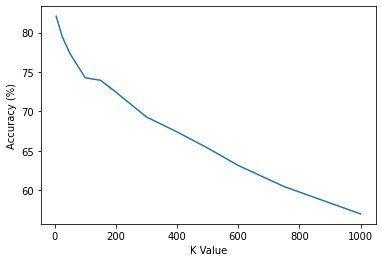

In [5]:
k_values = [5,25,50,100,150,200,300,400,500,600,750,1000]
knn_k_value(k_values, x_train, y_train, x_val, y_val)

K = 3 : Accuracy = 83.5043409629045
K = 6 : Accuracy = 83.97790055248619
K = 9 : Accuracy = 82.3993685872139
K = 12 : Accuracy = 81.9258089976322
K = 15 : Accuracy = 80.97868981846882
K = 18 : Accuracy = 81.68902920284135
K = 21 : Accuracy = 79.55801104972376
K = 24 : Accuracy = 80.50513022888714
K = 26 : Accuracy = 79.7947908445146


<module 'matplotlib.pyplot' from '/Users/gus/opt/anaconda3/envs/encoder/lib/python3.7/site-packages/matplotlib/pyplot.py'>

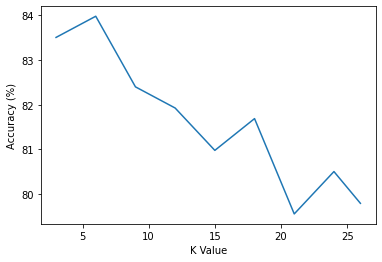

In [6]:
k_values = [3,6,9,12,15,18,21,24,26]
knn_k_value(k_values, x_train, y_train, x_val, y_val)

K = 3 : Accuracy = 83.5043409629045
K = 4 : Accuracy = 85.0828729281768
K = 5 : Accuracy = 82.08366219415943
K = 6 : Accuracy = 83.97790055248619
K = 7 : Accuracy = 81.8468823993686
K = 8 : Accuracy = 83.89897395422258
K = 9 : Accuracy = 82.3993685872139
K = 10 : Accuracy = 82.9518547750592
K = 11 : Accuracy = 81.13654301499605
K = 12 : Accuracy = 81.9258089976322


<module 'matplotlib.pyplot' from '/Users/gus/opt/anaconda3/envs/encoder/lib/python3.7/site-packages/matplotlib/pyplot.py'>

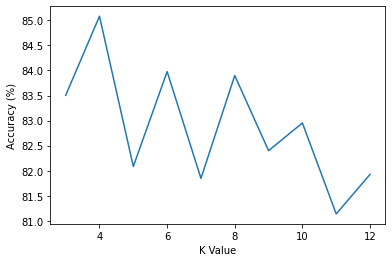

In [7]:
k_values = [3,4,5,6,7,8,9,10,11,12]
knn_k_value(k_values, x_train, y_train, x_val, y_val)

Choose K = 6 (make argument)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report 

KNN = KNeighborsClassifier(n_neighbors=6)
KNN.fit(x_train,y_train)
y_predict = KNN.predict(x_test)

print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
#This is the classification report and confusion matrix for the the K Nearest Neighbours Algorithm

[[498 130]
 [ 55 584]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       628
           1       0.82      0.91      0.86       639

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267



In [9]:
%time KNN.fit(x_train,y_train)

CPU times: user 3.57 ms, sys: 1.82 ms, total: 5.39 ms
Wall time: 4.19 ms


KNeighborsClassifier(n_neighbors=6)

In [10]:
x_2 = tf_idf_matrix.toarray()
labels_2 = df_output.values

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, labels_2, test_size=0.2, random_state = 42)
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_train, y_train, test_size=0.25, random_state = 42)

In [12]:
KNN_2 = KNeighborsClassifier(n_neighbors=6)
KNN_2.fit(x_train_2,y_train_2)
y_predict_2 = KNN_2.predict(x_test_2)

acc = sklearn.metrics.accuracy_score(y_test_2, y_predict_2)
print(acc)

0.8492501973164956


In [13]:
# The top news story on the BBC
bbc_news_article = '''The furlough scheme will be extended until the end of September by the chancellor in the Budget later.
Rishi Sunak said the scheme - which pays 80% of employees' wages for the hours they cannot work in the pandemic - would help millions through "the challenging months ahead".
Some 600,000 more self-employed people will also be eligible for government help as access to grants is widened.
But Labour said the support schemes should have been extended "months ago".
Mr Sunak will outline a three-point plan to support people through the coming months, rebuild the economy and "fix" the public finances in the wake of the pandemic when he delivers his statement to the Commons at about 12:30 GMT.
But he has warned of tough economic times ahead and there are reports that he plans to raise some taxes.'''

# Here's a fake news article from the New York Mag
fake_article = '''Twelve days out from judgment day in an election in which he continues to trail badly, President Trump continues to hammer home an issue that will surely resonate with that small slice of still-undecided voters: his supposedly unfair treatment at the hands of CBS’s Lesley Stahl. After two days of promising to release unedited footage of an as-yet-unaired 60 Minutes interview, during which he walked out prematurely because he was upset with Stahl’s line of questioning, the president finally followed through on Thursday. Throughout the interview, Stahl presses Trump on issues from health care (the president says he hopes the Supreme Court strikes down Obamacare, a politically toxic position) to his derogatory comments about Anthony Fauci (Trump claims he was misinterpreted) to his false claims that the Obama campaign spied on him. The tone is of an adversarial back-and-forth, well within normal journalistic bounds. Nevertheless, Trump continuously claims that Joe Biden hasn’t been given similar treatment by CBS and cuts the proceedings short.'''

In [14]:
def article_preprocessor (article):
    filtered_article = ''
    article = re.sub(r'[^\w\s]', '', article)
    words = [word.lower() for word in nltk.word_tokenize(article)]
    words = [word for word in words if not word in stop_words]
    words_lemmatized = []
    for word in words:
        if word == 'us':
            words_lemmatized.append(word)
        else:
            words_lemmatized.append(WNL.lemmatize(word))
    filtered_article = " ".join([word for word in words_lemmatized])
    return filtered_article

In [15]:
def KNN_classifier (list_of_articles,k):
    
    # Pre-process the articles
    articles_pp = [article_preprocessor(article) for article in list_of_articles]
    # Append new articles to original list of articles (df_input)
    new_input = df_input.append(pd.Series(articles_pp))
    tf_idf_matrix = vectorizer.fit_transform(new_input)
    orig_data_matrix = tf_idf_matrix[:len(df_input)]
    new_data_matrix = tf_idf_matrix[len(df_input):]
    x_train, x_test, y_train, y_test = train_test_split(orig_data_matrix, df_output, random_state=42)
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train, y_train)
    accuracy = KNN.score(x_test,y_test)
    # The model can now classify the new data
    predictions = KNN.predict(new_data_matrix)
    return predictions

In [16]:
articles = [bbc_news_article,fake_article]
KNN_classifier(articles,6)

array([1, 1])

## Autoencoder:

In [17]:
# 'hot encoding' the data (go from binary 0 or 1 to [1,0] and [0,1] respectively)

from keras.utils import to_categorical
print("example point's binary outcome:", labels[100])
labels = to_categorical(labels)
print("same example point's one hot encoded vector:", labels[100])

example point's binary outcome: 1
same example point's one hot encoded vector: [0. 1.]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25)

In [19]:
# scaling the training and validation data features. Removes mean and makes the datas variance = 1. 
# learns the correct transformation on the training data and then applies to the test data.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.toarray())

x_val = scaler.transform(x_val.toarray())
x_test = scaler.transform(x_test.toarray())

In [20]:
np.save('X_train_e',x_train)
np.save('Y_train_e',y_train)
np.save('X_val_e',x_val)
np.save('Y_val_e',y_val)
np.save('X_test_e',x_test)
np.save('Y_test_e',y_test)

Loading the Autoencoder:

In [21]:
from keras.models import model_from_json
from keras.optimizers import SGD
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics

In [22]:
# load json and create model
json_file = open('encoder.json', 'r')
loaded_encoder_json = json_file.read()
json_file.close()
loaded_encoder = model_from_json(loaded_encoder_json)

# load weights into new model
loaded_encoder.load_weights("encoder.h5")
print("Loaded encoder from disk")

LR = np.load('encoder_LR.npy')

Loaded encoder from disk


In [23]:
loaded_encoder.compile(loss='mse', optimizer=SGD(learning_rate = LR), metrics=['mse'])

In [24]:
def encoder(X_test):
    return loaded_encoder.predict(X_test)

In [25]:
def knn_acc_w_encoder(k_values, X_train, Y_train, X_val, Y_val):
    accuracy = []
    for i in k_values:
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(encoder(X_train),Y_train)
        Y_predict = KNN.predict(encoder(X_val))
        acc = sklearn.metrics.accuracy_score(Y_val, Y_predict)
        accuracy.append(acc*100)
        print("K = " + str(i) + " : Accuracy = " + str(acc*100))
    plt.plot(k_values, accuracy)
    plt.xlabel('K Value')
    plt.ylabel('Accuracy (%)')
    return plt

K = 5 : Accuracy = 50.5130228887135
K = 25 : Accuracy = 50.118389897395424
K = 50 : Accuracy = 45.77742699289661
K = 100 : Accuracy = 47.750591949486974
K = 150 : Accuracy = 49.4869771112865
K = 200 : Accuracy = 50.74980268350434
K = 300 : Accuracy = 50.19731649565904
K = 400 : Accuracy = 49.881610102604576
K = 500 : Accuracy = 49.171270718232044
K = 600 : Accuracy = 48.85556432517759
K = 750 : Accuracy = 48.61878453038674
K = 1000 : Accuracy = 47.19810576164167


<module 'matplotlib.pyplot' from '/Users/gus/opt/anaconda3/envs/encoder/lib/python3.7/site-packages/matplotlib/pyplot.py'>

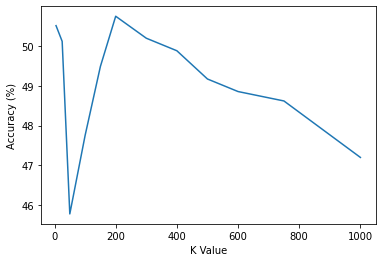

In [26]:
k_values = [5,25,50,100,150,200,300,400,500,600,750,1000]
knn_acc_w_encoder(k_values, x_train, y_train, x_val, y_val)